In [68]:
import numpy as np  # Linear Algebra
import pandas as pd  # Data processing, CSV file I/O
import streamlit as st
import time

# Graph plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
latest_iteration = st.empty()
bar = st.progress(0)
left_column, right_column = st.columns(2)
# You can use a column just like st.sidebar:
left_column.button('Press me!')

# Or even better, call Streamlit functions inside a "with" block:
with right_column:
    chosen = st.radio(
        'Sorting hat',
        ("Gryffindor", "Ravenclaw", "Hufflepuff", "Slytherin"))
    st.write(f"You are in {chosen} house!")
for i in range(100):
  # Update the progress bar with each iteration.
  latest_iteration.text(f'Iteration {i+1}')
  bar.progress(i + 1)
  time.sleep(0.1)

In [45]:
#Setup
Input = [18,"male",25,0,"no","southeast"]
age = Input[0]
sex = Input[1]
bmi = Input[2]
children = Input[3]
smoker = Input[4]
region = Input[5]

In [46]:
datafile= pd.read_csv("insurance.csv")
datafile

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [47]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [48]:
newData = datafile.loc[datafile['region']==region]
newData = newData.loc[datafile['sex']==sex]
newData = newData.loc[datafile['smoker']==smoker]
newData

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
22,18,male,34.10,0,no,southeast,1137.0110
42,41,male,21.78,1,no,southeast,6272.4772
61,25,male,33.66,4,no,southeast,4504.6624
...,...,...,...,...,...,...,...
1289,44,male,34.32,1,no,southeast,7147.4728
1292,21,male,23.21,0,no,southeast,1515.3449
1317,18,male,53.13,0,no,southeast,1163.4627
1322,62,male,38.83,0,no,southeast,12981.3457


In [49]:
newData.describe()

,age,bmi,children,charges
count,134.000000,134.000000,134.000000,134.000000
mean,38.261194,34.129552,1.052239,7609.003587
std,14.374648,6.638994,1.222085,5876.069916
min,18.000000,20.350000,0.000000,1121.873900
25%,25.250000,30.030000,0.000000,2597.226875
50%,38.500000,33.825000,1.000000,6395.947200
75%,50.750000,38.060000,2.000000,10754.171150
max,64.000000,53.130000,5.000000,27724.288750


C:\Users\wikim\AppData\Local\Temp\ipykernel_6848\4003946811.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(newData.corr(method='pearson'),annot=True)


<AxesSubplot: >

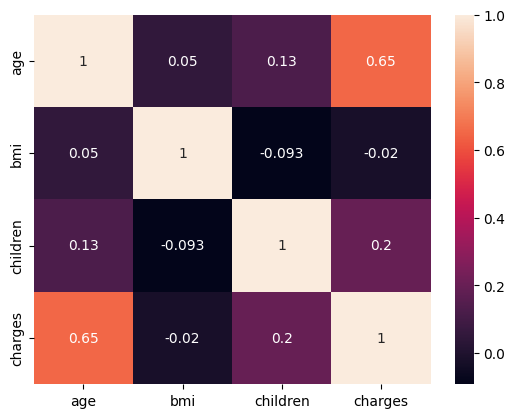

In [50]:
sns.heatmap(newData.corr(method='pearson'),annot=True)

In [51]:
X=newData.iloc[:,[True,False,True,True,False,False,False]]
X

,age,bmi,children
1,18,33.77,1
2,28,33.00,3
22,18,34.10,0
42,41,21.78,1
61,25,33.66,4
...,...,...,...
1289,44,34.32,1
1292,21,23.21,0
1317,18,53.13,0
1322,62,38.83,0


In [52]:
Y=newData.iloc[:,[False,False,False,False,False,False,True]]
Y

,charges
1,1725.5523
2,4449.4620
22,1137.0110
42,6272.4772
61,4504.6624
...,...
1289,7147.4728
1292,1515.3449
1317,1163.4627
1322,12981.3457


In [53]:
from sklearn.model_selection import train_test_split

seed = 42
test_percent = 0.1
split: list[np.ndarray] = train_test_split(X, Y, test_size=test_percent, random_state=seed)
X_train, X_test, y_train, y_test = split

In [60]:
X_test

,age,bmi,children
1273,35,27.61,1
670,30,31.57,3
1088,52,47.74,1
226,28,38.06,0
435,60,33.11,3
594,41,40.26,0
184,44,30.69,2
1115,55,32.67,1
1061,57,27.94,1
1066,48,37.29,2


In [54]:
def mse(y: np.ndarray, y_hat: np.ndarray):
    '''
    ### Mean Square Error

    ### Parameters
    y : ndarray
        the actual value of y.
    y_hat : ndarray
        the predicted value of y. 
    '''
    return ((y - y_hat).T.dot(y - y_hat) / len(y))[0, 0]

In [55]:
class ClosedFormRegression:
    def __init__(self):
        self.weights = None  # model parameters θ

    def fit(self, x: np.ndarray, y: np.ndarray):
        bias = np.ones((x.shape[0], 1))  # สร้าง x0
        x = np.concatenate((bias, x), axis=1)  # เพิ่ม x0 ใน column แรก
        self.weights = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)  # normal equation
        return self

    def predict(self, x: np.ndarray) -> np.ndarray:
        bias = np.ones((x.shape[0], 1))  # สร้าง x0
        x = np.concatenate((bias, x), axis=1)  # เพิ่ม x0 ใน column แรก
        return np.dot(x, self.weights)  # คำนวณ y_hat

    def score(self, x: np.ndarray, y: np.ndarray) -> np.float64:
        '''Calculate coefficient of determination (R^2)'''
        ss_mean = np.sum((y - y.mean()) ** 2)
        ss_fit = np.sum((y - self.predict(x)) ** 2)
        return (ss_mean - ss_fit) / ss_mean

In [56]:
model = ClosedFormRegression()
model.fit(X_train, y_train)
print("Train score:", model.score(X_train, y_train))
print(" Test score:", model.score(X_test, y_test))

Train score: charges    0.422674
dtype: float64
 Test score: charges    0.818076
dtype: float64


In [57]:
y_test_pred = model.predict(X_test)  # y test prediction
test_result = pd.DataFrame(X_test, columns=X.columns[:])
test_result['Price'] = y_test
test_result['Predict'] = y_test_pred
test_result['Error'] = y_test_pred - y_test
test_result

,age,bmi,children,Price,Predict,Error
1273,35,27.61,1,4747.0529,7097.182191,2350.129291
670,30,31.57,3,4837.5823,6742.485808,1904.903508
1088,52,47.74,1,9748.9106,10906.454715,1157.544115
226,28,38.06,0,2689.4954,4346.748864,1657.253464
435,60,33.11,3,13919.8229,14611.532301,691.709401
594,41,40.26,0,5709.1644,7704.947972,1995.783572
184,44,30.69,2,7731.4271,9919.102720,2187.675620
1115,55,32.67,1,10807.4863,12207.105189,1399.618889
1061,57,27.94,1,11554.2236,12894.790417,1340.566817
1066,48,37.29,2,8978.1851,10752.515876,1774.330776


In [58]:
X_test

,age,bmi,children
1273,35,27.61,1
670,30,31.57,3
1088,52,47.74,1
226,28,38.06,0
435,60,33.11,3
594,41,40.26,0
184,44,30.69,2
1115,55,32.67,1
1061,57,27.94,1
1066,48,37.29,2


In [62]:
inp = np.array([[20, 25, 0]])
model.predict(inp)


array([[2675.19814302]])